In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


**EDA Strategy**  

The EDA strategy for the datasets are based on three key objectives :  

1. Extract column and record sizes, to get a general idea about the shape and size of the data
2. Identification of missing values and using that to determine usability of dataset components
3. Identification of primary and foreign keys to plan a database schema for these datasets

In [71]:
def F1_dataset_EDA(dataset):
    
    df = pd.read_csv(dataset, na_values='\\N')
    
    # Get column names
    column_names = df.columns
    num_columns = len(column_names)
    # Calculate column sizes (non-null values)
    column_sizes = df.count()
    
    # Get data types of each column
    data_types = df.dtypes
    
    # Calculate percentage of NaNs in each column
    nans_percentage = df.isnull().mean() * 100
    
    # Prepare the results
    eda_results = {
        'column_names': column_names,
        'column_sizes': column_sizes,
        'data_types': data_types,
        'nans_percentage': nans_percentage
    }
    

    
    if nans_percentage.any():
        # Plotting the percentage of NaNs in each column
        plt.figure(figsize=(4, 4))
        nans_percentage.plot(kind='bar',color='#FE3E24')
        plt.xlabel('Columns')
        plt.ylabel('Percentage of NaNs')
        plt.title('Percentage of NaNs in Each Column')
        
        # Adding annotations 
        max_column_size = column_sizes.max()
        plt.annotate(f'Number of Variables: {num_columns}', xy=(0.9, 0.95), xycoords='axes fraction', fontsize=8, backgroundcolor='white')
        plt.annotate(f'Max Record Size: {max_column_size}', xy=(0.9, 0.85), xycoords='axes fraction', fontsize=8, backgroundcolor='white')     
        # Display the plot
        plt.show()
        print("Column Names:\n", eda_results['column_names'])
        print("\nData Types:\n", eda_results['data_types'])
        print("\nNumber of Variables:\n", num_columns)
        print("\nNumber of Records:\n", eda_results['column_sizes'])
    else:
        # Print out the column names, row and column sizes
        print("Column Names:\n", eda_results['column_names'])
        print("\nData Types:\n", eda_results['data_types'])
        print("\nNumber of Variables:\n", num_columns)
        print("\nNumber of Records:\n", eda_results['column_sizes'])
        
        
    return eda_results

In [72]:
dataset_file_path = './dataset/circuits.csv'
circuits_EDA = F1_dataset_EDA(dataset_file_path)


Column Names:
 Index(['circuitId', 'circuitRef', 'name', 'location', 'country', 'lat', 'lng',
       'alt', 'url'],
      dtype='object')

Data Types:
 circuitId       int64
circuitRef     object
name           object
location       object
country        object
lat           float64
lng           float64
alt             int64
url            object
dtype: object

Number of Variables:
 9

Number of Records:
 circuitId     77
circuitRef    77
name          77
location      77
country       77
lat           77
lng           77
alt           77
url           77
dtype: int64


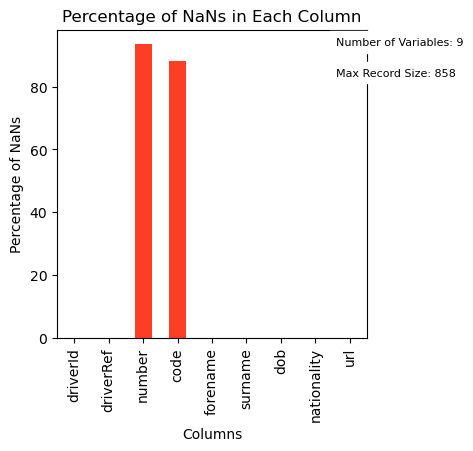

Column Names:
 Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')

Data Types:
 driverId         int64
driverRef       object
number         float64
code            object
forename        object
surname         object
dob             object
nationality     object
url             object
dtype: object

Number of Variables:
 9

Number of Records:
 driverId       858
driverRef      858
number          56
code           101
forename       858
surname        858
dob            858
nationality    858
url            858
dtype: int64


In [73]:
dataset_file_path = './dataset/drivers.csv'
drivers_EDA = F1_dataset_EDA(dataset_file_path)

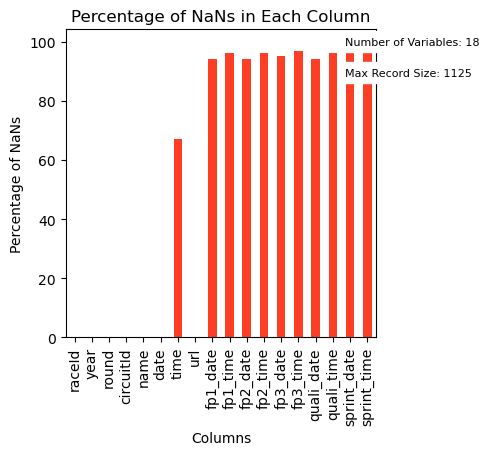

Column Names:
 Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')

Data Types:
 raceId          int64
year            int64
round           int64
circuitId       int64
name           object
date           object
time           object
url            object
fp1_date       object
fp1_time       object
fp2_date       object
fp2_time       object
fp3_date       object
fp3_time       object
quali_date     object
quali_time     object
sprint_date    object
sprint_time    object
dtype: object

Number of Variables:
 18

Number of Records:
 raceId         1125
year           1125
round          1125
circuitId      1125
name           1125
date           1125
time            371
url            1125
fp1_date         67
fp1_time         45
fp2_date         67
fp2_time         45
fp3_date         55
fp3_time 

In [74]:
dataset_file_path = './dataset/races.csv'
races_EDA = F1_dataset_EDA(dataset_file_path)

In [75]:
dataset_file_path = './dataset/driver_standings.csv'
d_standings_EDA = F1_dataset_EDA(dataset_file_path)

Column Names:
 Index(['driverStandingsId', 'raceId', 'driverId', 'points', 'position',
       'positionText', 'wins'],
      dtype='object')

Data Types:
 driverStandingsId      int64
raceId                 int64
driverId               int64
points               float64
position               int64
positionText          object
wins                   int64
dtype: object

Number of Variables:
 7

Number of Records:
 driverStandingsId    34364
raceId               34364
driverId             34364
points               34364
position             34364
positionText         34364
wins                 34364
dtype: int64


In [76]:
dataset_file_path = './dataset/lap_times.csv'
lap_times_EDA = F1_dataset_EDA(dataset_file_path)

Column Names:
 Index(['raceId', 'driverId', 'lap', 'position', 'time', 'milliseconds'], dtype='object')

Data Types:
 raceId           int64
driverId         int64
lap              int64
position         int64
time            object
milliseconds     int64
dtype: object

Number of Variables:
 6

Number of Records:
 raceId          563636
driverId        563636
lap             563636
position        563636
time            563636
milliseconds    563636
dtype: int64


**EDA Analysis and Conclusions**  
The results of the EDA of the dataset reveal a number of interesting features.   

    1. The 'races' dataset is the most incomplete containing several variables with a high percentage of missing values.  
    2. The 'drivers' dataset is the second most incomplete with two variables having a high percentage of missing values.  
    3. The variables 'raceId', 'driverId' and 'circuitId' do not have any missing values and being present across several datasets look like excellent candidates for primary and foreign keys in a database schema.  
    4. The primary numerical variables are present in the lap_times and driver_standings dataset while the circuits, drivers and races datasets primarily provide categorical information.  
    5. Further investigation into the races dataset reveals that there is a small percentage of useful data in the sprint and qualifying times, however this relatively small sub-dataset is not explored further in this investigation.